## Logistic Regression classifier

Logistic Regression uses the Sigmoid function as an activation function.
let's simply plot the sigmoid function for some values in the range –7 to 7 to see how it looks

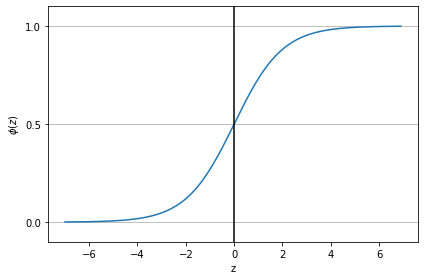

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()  #To get the current polar axes on the current figure
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

let's consider only `Iris-setosa` and `Iris-versicolor` flowers (classes `0` and `1`)

In [3]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("Class labels: ", np.unique(y)) #the Iris flower class names, Iris-setosa Iris-versicolor, and Iris-virginica (0, 1, 2).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Class labels:  [0 1 2]


In [5]:
import LogisticRegressionGD

from importlib import reload 	
LogisticRegressionGD = reload(LogisticRegressionGD)	# reload of my_module 
from LogisticRegressionGD import *

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], 
                    marker=markers[idx], label=cl, edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, 
                    linewidth=1, marker='o', s=100, label='test set')

C:\Users\promar\AppData\Local\Temp\ipykernel_10488\3167664362.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


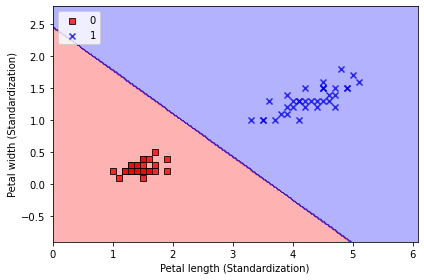

In [7]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X_train_01_subset, y_train_01_subset, lrgd)
plt.xlabel("Petal length (Standardization)")
plt.ylabel("Petal width (Standardization)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

Training a logistic regression model with scikit-learn

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) 

C:\Users\promar\AppData\Local\Temp\ipykernel_10488\3167664362.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


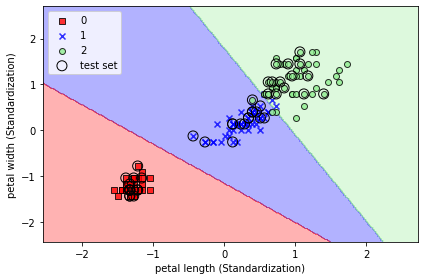

In [10]:
# multinomial classification using lbfgs optimizer
from sklearn.linear_model import LogisticRegression
# C is the inverse of the reqularization parameter to control overfitting
lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length (Standardization)')
plt.ylabel('petal width (Standardization)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\promar\AppData\Local\Temp\ipykernel_10488\3167664362.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


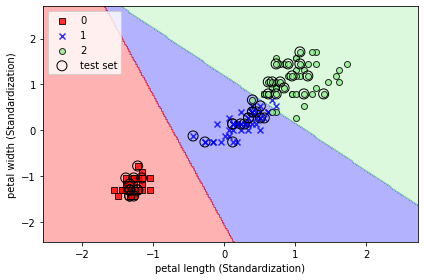

In [11]:
# OvR classification using lbfgs optimizer
lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length (Standardization)')
plt.ylabel('petal width (Standardization)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
print(lr.predict_proba(X_test_std[:3, :]))
print(lr.predict(X_test_std[:3, :]))

[[3.81527885e-09 1.44792866e-01 8.55207131e-01]
 [8.34020679e-01 1.65979321e-01 3.25737138e-13]
 [8.48831425e-01 1.51168575e-01 2.62277619e-14]]
[2 0 0]


If you want to predict the class label of a single flower example: scikit-learn expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy's reshape method to add a new dimension

In [14]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])